# Lesson 01: Scikit-learn入門

- scikit-learn本家：http://scikit-learn.org/stable/
- scikit-learn本家チュートリアル：http://scikit-learn.org/stable/tutorial/

In [1]:
import warnings

## ステップ１：データハンドリング

In [2]:
# scikit-learnを読み込む
import sklearn

In [3]:
# scikit-learnのバージョンを表示する
sklearn.__version__

'0.17.1'

In [4]:
# scikit-learnからデータセットを読み込む
from sklearn import datasets

In [6]:
# datasets.make_moons()を使い、1000個の入出力サンプル（X, y）を生成。
# noiseには0.2、乱数シードは0を使用する。
X, y = datasets.make_moons(noise=0.2, random_state=0, n_samples=1000)

In [48]:
# X自体を見る
X

array([[ 1.77780578,  0.60758943],
       [ 1.46176517, -0.4475523 ],
       [-0.8189727 ,  0.60739519],
       ..., 
       [-0.15495214, -1.64435644],
       [-0.35557878, -0.34459172],
       [-0.01889003, -1.4519874 ]])

In [49]:
# Xの形をみる
X.shape

(1000, 2)

In [50]:
# Xのデータ型をみる
type(X)

numpy.ndarray

## ステップ２：初期分析と仮説構築

In [51]:
# 可視化用ライブラリの読み込み
import matplotlib.pyplot as plt

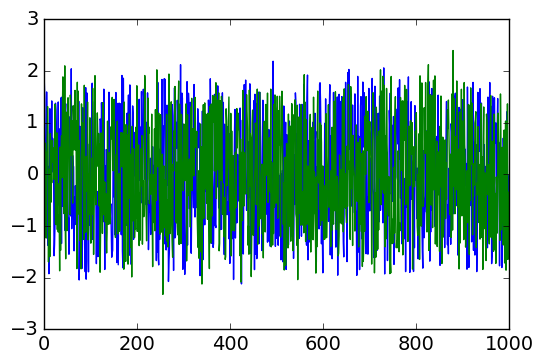

In [52]:
# plt.plotを使い描画
plt.plot(X)

In [53]:
# あれ図がでないぞ
%matplotlib inline

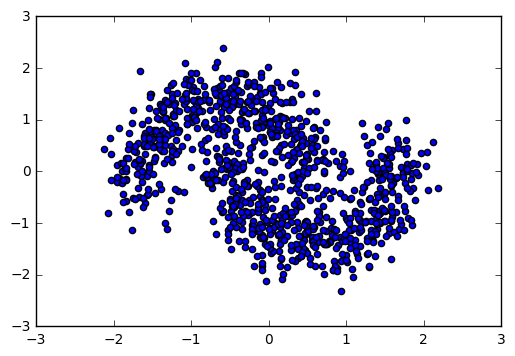

In [54]:
#  plt.scatterを使い描画
plt.scatter(X[:, 0], X[:, 1])

In [55]:
import matplotlib as mpl
mpl.rc('font', **{'size': 14})

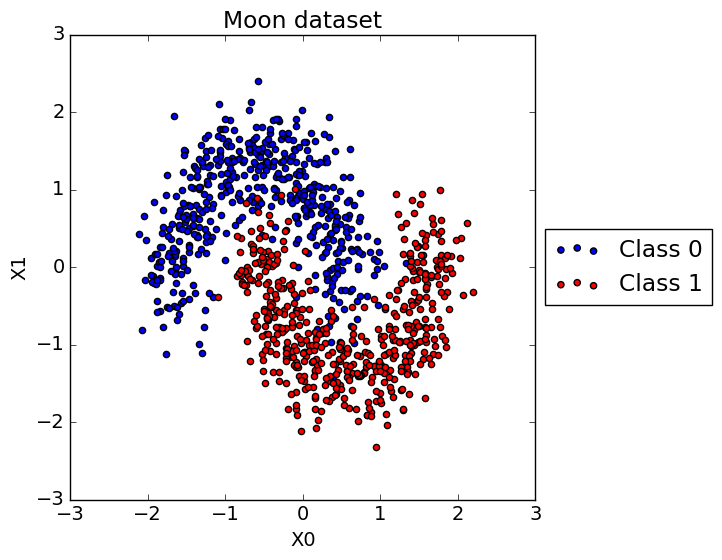

In [56]:
# 色分けして描画
fig, ax = plt.subplots(figsize=(6, 6))   # figsize=(幅, 高さ)
ax.scatter(X[y==0, 0], X[y==0, 1], c='b', label='Class 0')
ax.scatter(X[y==1, 0], X[y==1, 1], c='r', label='Class 1')
ax.legend(loc='center left',
          bbox_to_anchor=(1.02, 0.5,),  # 図左下を原点として(右, 上)に移動
          borderaxespad=0)  # レジェンド周りのパディング
ax.set(xlabel='X0', ylabel='X1', title="Moon dataset"); # ラベル等を記述
ax.set_aspect('equal', 'datalim') # 縦横のアスペクト比をそろえる

In [57]:
# データの散らばり具合（標準偏差）を見てみる
X.std(axis=0)

array([ 1.,  1.])

In [58]:
# skleranから前処理用モジュールを読み込む
from sklearn import preprocessing

In [59]:
# データの正規化
X = preprocessing.scale(X)

In [60]:
# データの散らばり具合（標準偏差）を再確認
X.std(axis=0)

array([ 1.,  1.])

In [61]:
# ラベル付きデータをトレーニングセットとテストセットに分割するためのモジュールを読み込む
from sklearn import cross_validation

In [62]:
# ラベル付きデータをトレーニングセット (X_train, y_train)とテストセット (X_test, y_test)に分割
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.2, random_state=42)

In [63]:
# X_trainの形
X_train.shape

(800, 2)

In [64]:
# y_trainの形
y_train.shape

(800,)

In [65]:
# X_testの形
X_test.shape

(200, 2)

In [66]:
# y_testの形
y_test.shape

(200,)

## ステップ３：機械学習

- 問題設定にあったモデルを選ぶ

- http://scikit-learn.org/stable/index.html
- http://scikit-learn.org/stable/modules/classes.html

In [67]:
# まずは簡単なモデルで試してみよう

# === 線形モデル ===
# モジュールの読み込み
from sklearn import linear_model
#  モデル構築
model = linear_model.LogisticRegression()

# === サポートベクターマシン ===
# モジュールの読み込み
#from sklearn import svm
#  モデル構築
#model = svm.SVC()

# === K最近傍法 ===
# モジュールの読み込み
#from sklearn.neighbors import KNeighborsClassifier
#  モデル構築
#model = KNeighborsClassifier()

# === ランダムフォレスト ===
# モジュールの読み込み
#from sklearn import ensemble
#  モデル構築
#model = ensemble.RandomForestClassifier(n_estimators=5, max_depth=10)

# === 勾配ブースティング ===
# モジュールの読み込み
#from sklearn import ensemble
#  モデル構築
#model = ensemble.GradientBoostingClassifier()

In [68]:
# 学習
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
# トレーニングセットに対する予測
y_train_pred = model.predict(X_train)

In [70]:
# テストセットに対する予測
y_test_pred = model.predict(X_test)

## ステップ４：結果の評価

#### 結果の評価（方法１）：y_test_predを使って予測精度を出す

In [71]:
# 評価基準モジュール（metrics）の読み込み
from sklearn import metrics

In [81]:
# トレーニングデータに対する予測精度を計算
print (metrics.accuracy_score(y_train, y_train_pred))

0.88125


In [82]:
# テストデータに対する予測精度を計算
print (metrics.accuracy_score(y_test, y_test_pred))

0.795


#### 結果の評価：（方法２）: model.score(X, y)を使って予測精度を出す

In [83]:
# トレーニングデータに対する予測精度を計算
print(model.score(X_train, y_train))

0.88125


In [84]:
# テストデータに対する予測精度を計算
print(model.score(X_test, y_test))

0.795


#### 結果を見やすいように整形

In [86]:
print (u"トレーニングデータの予測精度： {0:.1f}%".format(model.score(X_train, y_train) * 100))
print (u"テストデータの予測精度： {0:.1f}%".format(model.score(X_test, y_test) * 100))

トレーニングデータの予測精度： 88.1%
テストデータの予測精度： 79.5%


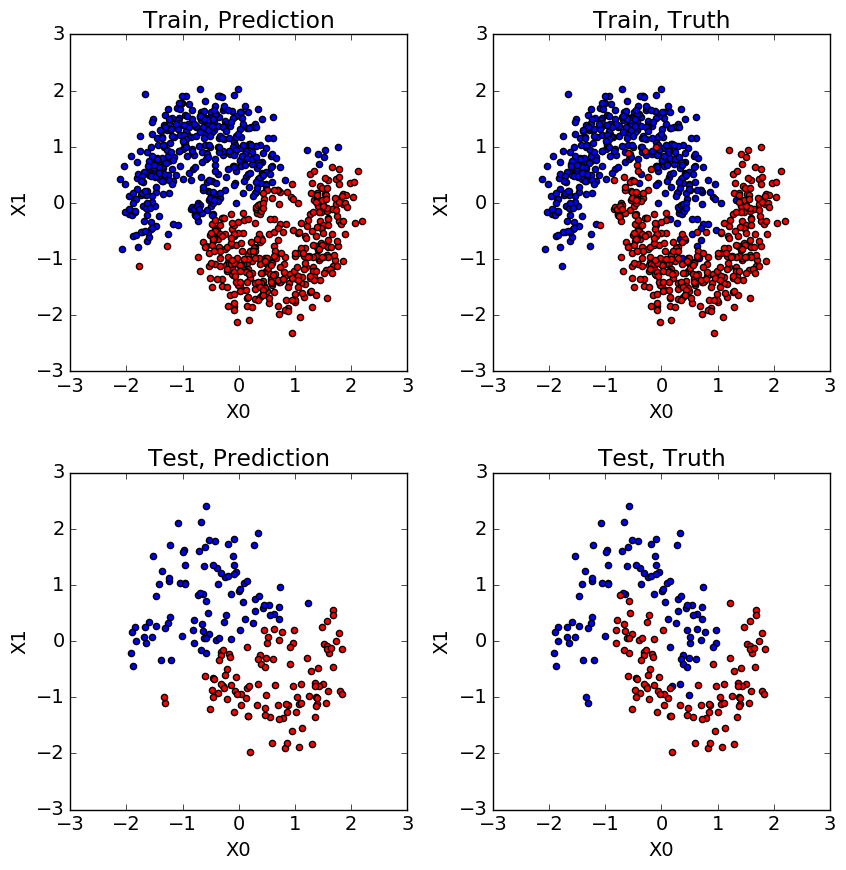

In [89]:
# 結果の可視化

fig, ax = plt.subplots(2, 2, figsize=(10, 10));

for ii in range(2):
    for jj in range(2):
        if ii == 0:
            XX = X_train
            yy = y_train_pred if jj == 0 else y_train
            title = "Train, Prediction" if jj == 0 else "Train, Truth"
        elif ii == 1:
            XX = X_test
            yy = y_test_pred if (jj == 0) else y_test
            title = "Test, Prediction" if jj == 0 else "Test, Truth"
            
        ax[ii, jj].scatter(XX[yy==0, 0], XX[yy==0, 1], c='b', label='Class 0')
        ax[ii, jj].scatter(XX[yy==1, 0], XX[yy==1, 1], c='r', label='Class 1')
        ax[ii, jj].set(xlabel='X0', ylabel='X1', title=title);
        ax[ii, jj].set_aspect('equal')
        
fig.subplots_adjust(wspace=0.2, hspace=0.3)

/opt/homebrew/var/pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/opt/homebrew/var/pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


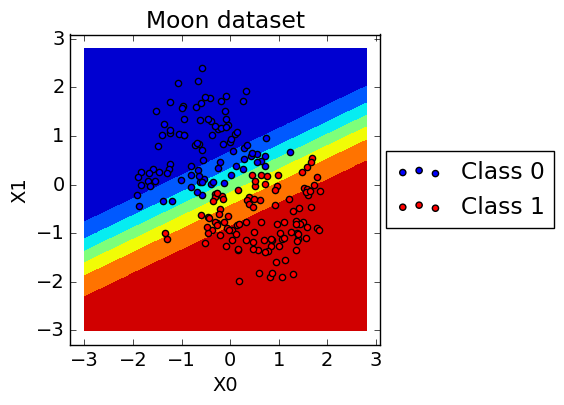

In [90]:
# 入力空間全体にモデルの予測値を描画

import numpy as np

x_min = -3; x_max = 3
y_min = -3; y_max = 3
h = 0.2

# 空間をメッシュ状に区切り、各点での予測を得る
xs, ys = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
zs = model.predict_proba(np.c_[xs.ravel(), ys.ravel()])[:, 1]
zs = zs.reshape(xs.shape)

fig, ax = plt.subplots()
# 入力空間全体におけるモデルの予測値
ax.contourf(xs, ys, zs) 
# テストセットの各入力点における予測値
ax.scatter(X_test[y_test_pred==0, 0], X_test[y_test_pred==0, 1], label='Class 0')
ax.scatter(X_test[y_test_pred==1, 0], X_test[y_test_pred==1, 1], c='r', label='Class 1')
ax.legend(bbox_to_anchor=(1.02, 0.5,), loc='center left', borderaxespad=0)
ax.set_aspect('equal')

ax.set(xlabel='X0', ylabel='X1', title="Moon dataset");

### モデル選択

- [分類器の比較](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [38]:
# 分類モデルの読み込み

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# K最近傍法
from sklearn.neighbors import KNeighborsClassifier
# サーポートベクターマシン
from sklearn.svm import SVC
# 決定木
from sklearn.tree import DecisionTreeClassifier
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
# 勾配ブースティング
from sklearn.ensemble import GradientBoostingClassifier

#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [39]:
# 交差検証用モジュールの読み込み

from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score

In [40]:
# KFoldを使って交差検証の舞台裏を理解
kfold = KFold(n=8, n_folds=4, random_state=42, shuffle=False)
for ii, jj in kfold:
    print ii, jj

[2 3 4 5 6 7] [0 1]
[0 1 4 5 6 7] [2 3]
[0 1 2 3 6 7] [4 5]
[0 1 2 3 4 5] [6 7]


In [41]:
# StratifiedKFoldを使って交差検証の舞台裏を理解
yy = np.array(([0] * 12 + [1] * 4))
skfold = StratifiedKFold(yy, n_folds=4)

for ii, jj in skfold:
    print ii, jj

[ 3  4  5  6  7  8  9 10 11 13 14 15] [ 0  1  2 12]
[ 0  1  2  6  7  8  9 10 11 12 14 15] [ 3  4  5 13]
[ 0  1  2  3  4  5  9 10 11 12 13 15] [ 6  7  8 14]
[ 0  1  2  3  4  5  6  7  8 12 13 14] [ 9 10 11 15]


In [42]:
# cross_val_scoreを使った交差検証

# モデルの構築
model = LogisticRegression()

# cross_val_scoreを使った交差検証。cvに自分で作ったcvオブジェクト（kfold）を渡しても良い。
result = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

#kfold = KFold(n=X_train.shape[0], n_folds=5, random_state=42, shuffle=True)
#result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# 結果の表示
print("{0}\n{1:.3f} ({2:.3f})\n{3}".format(result, result.mean(), result.std(), model.__str__()))

[ 0.8447205   0.875       0.91875     0.86875     0.90566038]
0.883 (0.027)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [43]:
# np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
# from sklearn.cross_validation import cross_val_score
# cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')

In [44]:
#　複数の分類器を用意
classifiers = [
    ('lr', LogisticRegression()), 
    ('knn', KNeighborsClassifier()),
    ('linear svc', SVC(kernel="linear")),
    ('rbf svc', SVC(gamma=2)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gbc', GradientBoostingClassifier()),
    #('ab', AdaBoostClassifier()),    
    #('gnb', GaussianNB()),
    #('lda', LinearDiscriminantAnalysis()),
    #('qda', QuadraticDiscriminantAnalysis())
]

In [45]:
# それぞれのモデルに対して、交差検証（CV）をかける
import time
results = {}
exec_times = {}

for name, model in classifiers:
    tic = time.time()
    result = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    exec_time = time.time() - tic
    exec_times[name] = exec_time
    results[name] = result
    
    print("{0:.3f} ({1:.3f}): time {2:.2f}s, {3}".format(result.mean(), result.std(), exec_time, name))

0.883 (0.027): time 0.01s, lr
0.965 (0.020): time 0.02s, knn
0.879 (0.024): time 0.03s, linear svc
0.965 (0.020): time 0.02s, rbf svc
0.950 (0.021): time 0.01s, dt
0.958 (0.023): time 0.20s, rf
0.960 (0.021): time 0.31s, gbc


In [46]:
# 結果の描画を楽にするためpandasを使う
# まずはライブラリの読み込み
import pandas as pd

In [47]:
# 結果をデータフレームに入れる
df = pd.DataFrame(results)

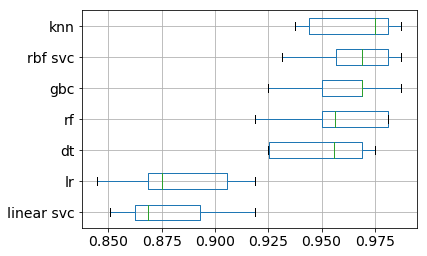

In [48]:
# ボックスプロットによる結果の描画
warnings.simplefilter("ignore")

df[df.median().sort_values(ascending=True).index].boxplot(vert=False);

In [49]:
# 結果とモデルパラメータの詳細表示
for name, model in classifiers:
    result = results[name]
    print("{0:.3f} ({1:.3f})\n{2}\n{3}\n----------".format(result.mean(), result.std(), result, model.__str__()))

0.883 (0.027)
[ 0.8447205   0.875       0.91875     0.86875     0.90566038]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----------
0.965 (0.020)
[ 0.94409938  0.975       0.98125     0.9375      0.98742138]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
----------
0.879 (0.024)
[ 0.85093168  0.8625      0.91875     0.86875     0.89308176]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------
0.965 (0.020)
[ 0.95652174  0.96875     0.98125     0.93125     0.98742138]
SVC(C=1

In [50]:
# 計算時間でソート
sorted(exec_times.items(), key=lambda x: x[1])

[('dt', 0.013146162033081055),
 ('lr', 0.013862848281860352),
 ('knn', 0.016762971878051758),
 ('rbf svc', 0.022712230682373047),
 ('linear svc', 0.02742791175842285),
 ('rf', 0.1999340057373047),
 ('gbc', 0.31331491470336914)]

### ハイパーパラメーターサーチ

#### １次元の場合

In [51]:
# validation_curveモジュールを読み込む
from sklearn.learning_curve import validation_curve

In [52]:
# ハイパーパラメータの取り得る範囲をparam_rangeで決める
param_range = np.arange(1, 20)

# validation_curve()を使いtrain_scoresとavalid_scoresを得る。
# パラメータ名はparam_nameで指定
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), 
                                              X_train, y_train, param_name="n_neighbors", 
                                              param_range=param_range)

In [53]:
def plot_validation_curve(train_scores, valid_scores, plot=plt.plot):

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    plt.title("Validation Curve")
    plt.xlabel("Hyperparameter")
    plt.ylabel("Score")
    #plt.ylim(0.0, 1.1)
    plot(param_range, train_scores_mean, label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plot(param_range, valid_scores_mean, label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.2, color="g")
    plt.legend(loc="best")
    plt.show()

    print "Best parameter is {}".format(param_range[valid_scores_mean.argmax()])

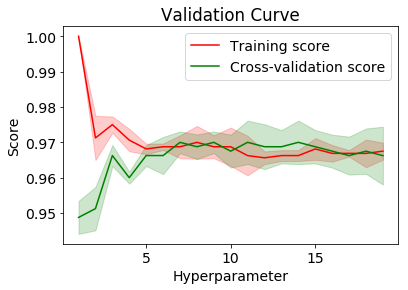

Best parameter is 7


In [54]:
# validation curveを描画する
plot_validation_curve(train_scores, valid_scores)

In [55]:
# モデルの構築（ラインサーチで見つけたベストなパラメータを使う）
best_model = KNeighborsClassifier(n_neighbors=7)

# モデルの学習
best_model.fit(X_train, y_train)

# トレーニングデータに対する予測精度
print "mean accuracy (train): {0:.4f}".format(best_model.score(X_train, y_train))

# テストデータに対する予測精度
# この値が実際に学習済みのシステムをデプロイした際に得られるであろう予測精度
# この値を計算するときにだけテストデータを使う(超重要)
print "mean accuracy (test): {0:.4f}".format(best_model.score(X_test, y_test))

mean accuracy (train): 0.9725
mean accuracy (test): 0.9550


#### ２次元の場合

参考資料：[RBF SVM parameters (scikit-learn)](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

In [56]:
# GridSearchCVモジュールの読み込み
from sklearn.grid_search import GridSearchCV

In [57]:
# モデルの構築
model = SVC(kernel='rbf')

# 各ハイパーパラメータごとに調べるポイントを決める
C_range = np.logspace(-2, 3, 6)
gamma_range = np.logspace(-3, 2, 6)

# 探索範囲をparam_gridにまとめる
param_grid = dict(gamma=gamma_range, C=C_range)

# GridSearchCVを使い、グリッドサーチオブジェクトを構築
gs = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)

# グリッドサーチを実行
gs.fit(X_train, y_train)

# 最良のハイパーパラメータを表示
print("The best parameters are %s with a score of %0.2f"
      % (gs.best_params_, gs.best_score_))

The best parameters are {'C': 0.10000000000000001, 'gamma': 10.0} with a score of 0.97


In [58]:
# ハイパーパラメータの組み合わせに対する評価値をすべて列挙
gs.grid_scores_

[mean: 0.50750, std: 0.00153, params: {'C': 0.01, 'gamma': 0.001},
 mean: 0.50750, std: 0.00153, params: {'C': 0.01, 'gamma': 0.01},
 mean: 0.88000, std: 0.02387, params: {'C': 0.01, 'gamma': 0.10000000000000001},
 mean: 0.91250, std: 0.02285, params: {'C': 0.01, 'gamma': 1.0},
 mean: 0.50750, std: 0.00153, params: {'C': 0.01, 'gamma': 10.0},
 mean: 0.50750, std: 0.00153, params: {'C': 0.01, 'gamma': 100.0},
 mean: 0.50750, std: 0.00153, params: {'C': 0.10000000000000001, 'gamma': 0.001},
 mean: 0.87875, std: 0.02610, params: {'C': 0.10000000000000001, 'gamma': 0.01},
 mean: 0.88000, std: 0.02001, params: {'C': 0.10000000000000001, 'gamma': 0.10000000000000001},
 mean: 0.96000, std: 0.01282, params: {'C': 0.10000000000000001, 'gamma': 1.0},
 mean: 0.96625, std: 0.01958, params: {'C': 0.10000000000000001, 'gamma': 10.0},
 mean: 0.51750, std: 0.00424, params: {'C': 0.10000000000000001, 'gamma': 100.0},
 mean: 0.87875, std: 0.02610, params: {'C': 1.0, 'gamma': 0.001},
 mean: 0.88000, std:

In [59]:
# 見やすくするためにデータフレームに入れる
cv_scores = []
for gsgs in gs.grid_scores_:
    tmp = gsgs.parameters.values() + gsgs.cv_validation_scores.tolist()
    cv_scores.append(tmp)
    
param_names = gsgs.parameters.keys()
columns = param_names + np.arange(len(gsgs.cv_validation_scores)).tolist()

df_gs = pd.DataFrame(cv_scores, columns=columns)
df_gs.set_index(param_names, inplace=True)

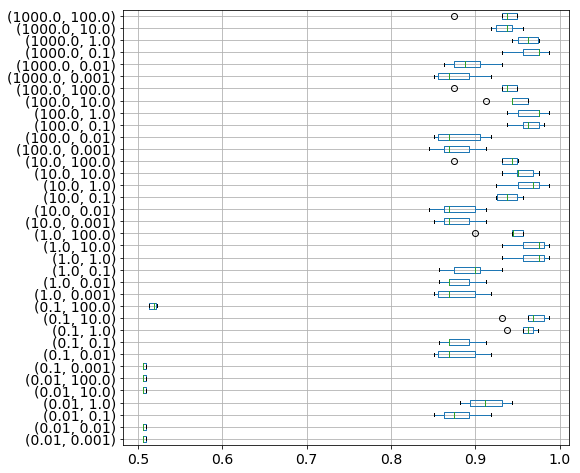

In [60]:
# boxplotで見てみる
warnings.simplefilter("ignore")

fig, ax = plt.subplots(figsize=(8, 8))
df_gs.T.boxplot(vert=False, ax=ax);

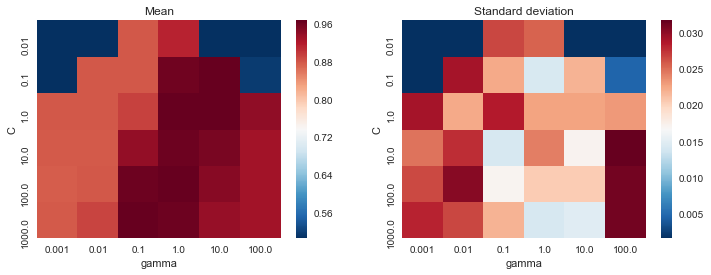

In [61]:
# ヒートマップで可視化
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(df_gs.mean(axis=1).unstack(), ax=ax[0], cmap='RdBu_r')
ax[0].set_title('Mean')
sns.heatmap(df_gs.std(axis=1).unstack(), ax=ax[1], cmap="RdBu_r")
ax[1].set_title('Standard deviation')

In [62]:
# モデルの構築（グリッドサーチで見つけたベストなパラメータを使用）
best_model = SVC(kernel='rbf', C=0.1, gamma=10.0)

# モデルの学習
best_model.fit(X_train, y_train)

# トレーニングデータに対する予測精度
print "mean accuracy (train): {0:.4f}".format(best_model.score(X_train, y_train))

# テストデータに対する予測精度
print "mean accuracy (test): {0:.4f}".format(best_model.score(X_test, y_test))

mean accuracy (train): 0.9688
mean accuracy (test): 0.9600


#### 3次元以上の場合

- 方法１：GridSearchCVを使う
    - パラメータ空間の次元がそれほど高くないときは使えるが、すぐに次元の呪いでキツくなる...
- 方法２: RandomizedSearchCVを使う
    - 高次元になった場合はランダムサーチの方が効率的

In [63]:
# ランダムサーチ用にRandomizedSearchCVモジュールを読み込む
from sklearn.grid_search import RandomizedSearchCV

In [64]:
# 分布を指定するためにscipy.statsを読み込む
import scipy.stats as stats

In [65]:
# パラメータ空間上に分布を指定する（今回はランダムフォレストを仮定）
param_dist = {"max_depth": [3, 4, 5, None],
              "max_features": stats.randint(1, 3),
              "min_samples_split": stats.randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [68]:
# ランダムサーチCVオブジェクトを作る
random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                                   param_distributions=param_dist, cv=10, 
                                   n_iter=30, random_state=42, n_jobs=-1)

In [70]:
# ランダムサーチを実行
tic = time.time() # 時間計測開始
random_search_rf.fit(X_train, y_train)
toc = time.time() # 時間計測終了

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/kaito/anaconda/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/Users/kaito/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = ''
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/Users/kaito/anaconda/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x100e7b730, file "/Use...2.7/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/kaito/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/Users/kaito...python2.7/site-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_fname='/Users/kaito/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x100e7b730, file "/Use...2.7/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/kaito/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from '/Users/kaito...python2.7/site-packages/ipykernel/kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()
     17 
     18 
     19 
     20 

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'# \u30e9\u30f3\u30c0\u30e0\u30b5\u30fc\u30c1\u...me.time() # \u6642\u9593\u8a08\u6e2c\u7d42\u4e86', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 7, 29, 8, 29, 2, 633406, tzinfo=tzutc()), u'msg_id': u'96740500B0A54B43AE3FC81644ECF6B1', u'msg_type': u'execute_request', u'session': u'BCF68EC2319E47FCBA029A66B685B489', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'96740500B0A54B43AE3FC81644ECF6B1', 'msg_type': u'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['BCF68EC2319E47FCBA029A66B685B489']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'# \u30e9\u30f3\u30c0\u30e0\u30b5\u30fc\u30c1\u...me.time() # \u6642\u9593\u8a08\u6e2c\u7d42\u4e86', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 7, 29, 8, 29, 2, 633406, tzinfo=tzutc()), u'msg_id': u'96740500B0A54B43AE3FC81644ECF6B1', u'msg_type': u'execute_request', u'session': u'BCF68EC2319E47FCBA029A66B685B489', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'96740500B0A54B43AE3FC81644ECF6B1', 'msg_type': u'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['BCF68EC2319E47FCBA029A66B685B489'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'# \u30e9\u30f3\u30c0\u30e0\u30b5\u30fc\u30c1\u...me.time() # \u6642\u9593\u8a08\u6e2c\u7d42\u4e86', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 7, 29, 8, 29, 2, 633406, tzinfo=tzutc()), u'msg_id': u'96740500B0A54B43AE3FC81644ECF6B1', u'msg_type': u'execute_request', u'session': u'BCF68EC2319E47FCBA029A66B685B489', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'96740500B0A54B43AE3FC81644ECF6B1', 'msg_type': u'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'# \u30e9\u30f3\u30c0\u30e0\u30b5\u30fc\u30c1\u...me.time() # \u6642\u9593\u8a08\u6e2c\u7d42\u4e86', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'# \u30e9\u30f3\u30c0\u30e0\u30b5\u30fc\u30c1\u...me.time() # \u6642\u9593\u8a08\u6e2c\u7d42\u4e86'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u'# \u30e9\u30f3\u30c0\u30e0\u30b5\u30fc\u30c1\u...me.time() # \u6642\u9593\u8a08\u6e2c\u7d42\u4e86',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u'# \u30e9\u30f3\u30c0\u30e0\u30b5\u30fc\u30c1\u...me.time() # \u6642\u9593\u8a08\u6e2c\u7d42\u4e86',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'# \u30e9\u30f3\u30c0\u30e0\u30b5\u30fc\u30c1\u...me.time() # \u6642\u9593\u8a08\u6e2c\u7d42\u4e86', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>], cell_name='<ipython-input-70-92deac4019b4>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 1103afcd0, execution_..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1109175b0, file "<ipython-input-70-92deac4019b4>", line 3>
        result = <ExecutionResult object at 1103afcd0, execution_..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1109175b0, file "<ipython-input-70-92deac4019b4>", line 3>, result=<ExecutionResult object at 1103afcd0, execution_..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1109175b0, file "<ipython-input-70-92deac4019b4>", line 3>
        self.user_global_ns = {'C_range': array([  1.00000000e-02,   1.00000000e-01,   1.0...0000000e+01,   1.00000000e+02,   1.00000000e+03]), 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'IFrame': <class 'IPython.lib.display.IFrame'>, 'In': ['', u"from IPython.display import IFrame\nIFrame('ht...scikit-learn.org/stable', width=800, height=400)", u'import warnings', u'# scikit-learn\u3092\u8aad\u307f\u8fbc\u3080\nimport sklearn', u'# scikit-learn\u306e\u30d0\u30fc\u30b8\u30e7\u...092\u8868\u793a\u3059\u308b\nsklearn.__version__', u'# scikit-learn\u304b\u3089\u30c7\u30fc\u30bf\u...\u307f\u8fbc\u3080\nfrom sklearn import datasets', u'# datasets.make_moons()\u3092\u4f7f\u3044\u300...moons(noise=0.2, random_state=0, n_samples=1000)', u'# X\u81ea\u4f53\u3092\u898b\u308b\nX', u'# X\u306e\u5f62\u3092\u307f\u308b\nX.shape', u'# X\u306e\u30c7\u30fc\u30bf\u578b\u3092\u307f\u308b\ntype(X)', u'# \u53ef\u8996\u5316\u7528\u30e9\u30a4\u30d6\u...07f\u8fbc\u307f\nimport matplotlib.pyplot as plt', u'# plt.plot\u3092\u4f7f\u3044\u63cf\u753b\nplt.plot(X)', u"# \u3042\u308c\u56f3\u304c\u3067\u306a\u3044\u305e\nget_ipython().magic(u'matplotlib inline')", u'#  plt.scatter\u3092\u4f7f\u3044\u63cf\u753b\nplt.scatter(X[:, 0], X[:, 1])', u"import matplotlib as mpl\nmpl.rc('font', **{'size': 14})", u'# \u8272\u5206\u3051\u3057\u3066\u63cf\u753b\n...\u30af\u30c8\u6bd4\u3092\u305d\u308d\u3048\u308b', u'# \u30c7\u30fc\u30bf\u306e\u6563\u3089\u3070\u...f09\u3092\u898b\u3066\u307f\u308b\nX.std(axis=0)', u'# skleran\u304b\u3089\u524d\u51e6\u7406\u7528\...f\u8fbc\u3080\nfrom sklearn import preprocessing', u'# \u30c7\u30fc\u30bf\u306e\u6b63\u898f\u5316\nX = preprocessing.scale(X)', u'# \u30c7\u30fc\u30bf\u306e\u6563\u3089\u3070\u...dee\uff09\u3092\u518d\u78ba\u8a8d\nX.std(axis=0)', ...], 'KFold': <class 'sklearn.cross_validation.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {1: <IPython.lib.display.IFrame object>, 4: '0.18.1', 7: array([[ 2.08614399,  0.57401401],
       [ 1.80... 0.06229272],
       [ 0.48561562, -0.53284399]]), 8: (1000, 2), 9: <type 'numpy.ndarray'>, 11: [<matplotlib.lines.Line2D object>, <matplotlib.lines.Line2D object>], 13: <matplotlib.collections.PathCollection object>, 16: array([ 0.89081767,  0.5374201 ]), 19: array([ 1.,  1.]), 22: (800, 2), ...}, ...}
        self.user_ns = {'C_range': array([  1.00000000e-02,   1.00000000e-01,   1.0...0000000e+01,   1.00000000e+02,   1.00000000e+03]), 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'IFrame': <class 'IPython.lib.display.IFrame'>, 'In': ['', u"from IPython.display import IFrame\nIFrame('ht...scikit-learn.org/stable', width=800, height=400)", u'import warnings', u'# scikit-learn\u3092\u8aad\u307f\u8fbc\u3080\nimport sklearn', u'# scikit-learn\u306e\u30d0\u30fc\u30b8\u30e7\u...092\u8868\u793a\u3059\u308b\nsklearn.__version__', u'# scikit-learn\u304b\u3089\u30c7\u30fc\u30bf\u...\u307f\u8fbc\u3080\nfrom sklearn import datasets', u'# datasets.make_moons()\u3092\u4f7f\u3044\u300...moons(noise=0.2, random_state=0, n_samples=1000)', u'# X\u81ea\u4f53\u3092\u898b\u308b\nX', u'# X\u306e\u5f62\u3092\u307f\u308b\nX.shape', u'# X\u306e\u30c7\u30fc\u30bf\u578b\u3092\u307f\u308b\ntype(X)', u'# \u53ef\u8996\u5316\u7528\u30e9\u30a4\u30d6\u...07f\u8fbc\u307f\nimport matplotlib.pyplot as plt', u'# plt.plot\u3092\u4f7f\u3044\u63cf\u753b\nplt.plot(X)', u"# \u3042\u308c\u56f3\u304c\u3067\u306a\u3044\u305e\nget_ipython().magic(u'matplotlib inline')", u'#  plt.scatter\u3092\u4f7f\u3044\u63cf\u753b\nplt.scatter(X[:, 0], X[:, 1])', u"import matplotlib as mpl\nmpl.rc('font', **{'size': 14})", u'# \u8272\u5206\u3051\u3057\u3066\u63cf\u753b\n...\u30af\u30c8\u6bd4\u3092\u305d\u308d\u3048\u308b', u'# \u30c7\u30fc\u30bf\u306e\u6563\u3089\u3070\u...f09\u3092\u898b\u3066\u307f\u308b\nX.std(axis=0)', u'# skleran\u304b\u3089\u524d\u51e6\u7406\u7528\...f\u8fbc\u3080\nfrom sklearn import preprocessing', u'# \u30c7\u30fc\u30bf\u306e\u6b63\u898f\u5316\nX = preprocessing.scale(X)', u'# \u30c7\u30fc\u30bf\u306e\u6563\u3089\u3070\u...dee\uff09\u3092\u518d\u78ba\u8a8d\nX.std(axis=0)', ...], 'KFold': <class 'sklearn.cross_validation.KFold'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {1: <IPython.lib.display.IFrame object>, 4: '0.18.1', 7: array([[ 2.08614399,  0.57401401],
       [ 1.80... 0.06229272],
       [ 0.48561562, -0.53284399]]), 8: (1000, 2), 9: <type 'numpy.ndarray'>, 11: [<matplotlib.lines.Line2D object>, <matplotlib.lines.Line2D object>], 13: <matplotlib.collections.PathCollection object>, 16: array([ 0.89081767,  0.5374201 ]), 19: array([ 1.,  1.]), 22: (800, 2), ...}, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/Users/kaito/Python_Beginners/beginners/basic/<ipython-input-70-92deac4019b4> in <module>()
      1 
      2 
----> 3 
      4 # ランダムサーチを実行
      5 tic = time.time() # 時間計測開始
      6 random_search_rf.fit(X_train, y_train)
      7 toc = time.time() # 時間計測終了
      8 
      9 
     10 

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py in fit(self=RandomizedSearchCV(cv=10, error_score='raise',
 ...2, refit=True,
          scoring=None, verbose=0), X=array([[ 0.31737197, -0.17310756],
       [ 0.01... 1.54321727],
       [-0.09029165,  0.31200272]]), y=array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,... 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]))
   1020 
   1021         """
   1022         sampled_params = ParameterSampler(self.param_distributions,
   1023                                           self.n_iter,
   1024                                           random_state=self.random_state)
-> 1025         return self._fit(X, y, sampled_params)
        self._fit = <bound method RandomizedSearchCV._fit of Randomi..., refit=True,
          scoring=None, verbose=0)>
        X = array([[ 0.31737197, -0.17310756],
       [ 0.01... 1.54321727],
       [-0.09029165,  0.31200272]])
        y = array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,... 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0])
        sampled_params = <sklearn.grid_search.ParameterSampler object>
   1026 
   1027 
   1028 
   1029 

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py in _fit(self=RandomizedSearchCV(cv=10, error_score='raise',
 ...2, refit=True,
          scoring=None, verbose=0), X=array([[ 0.31737197, -0.17310756],
       [ 0.01... 1.54321727],
       [-0.09029165,  0.31200272]]), y=array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,... 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]), parameter_iterable=<sklearn.grid_search.ParameterSampler object>)
    568         )(
    569             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    570                                     train, test, self.verbose, parameters,
    571                                     self.fit_params, return_parameters=True,
    572                                     error_score=self.error_score)
--> 573                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterSampler object>
    574                 for train, test in cv)
    575 
    576         # Out is a list of triplet: score, estimator, n_test_samples
    577         n_fits = len(out)

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object <genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Sat Jul 29 17:29:02 2017
PID: 41954                  Python 2.7.13: /Users/kaito/anaconda/bin/python
...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestClassifier(bootstrap=True, class_wei...tate=42,
            verbose=0, warm_start=False), array([[ 0.31737197, -0.17310756],
       [ 0.01... 1.54321727],
       [-0.09029165,  0.31200272]]), array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,... 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]), <function _passthrough_scorer>, array([ 70,  72,  74,  75,  76,  77,  79,  83,  ..., 792, 793, 794, 795,
       796, 797, 798, 799]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 69, 71, 73, 78, 80, 81, 82, 86, 91, 92, 94, 95]), 0, {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 1}, {})
        kwargs = {'error_score': 'raise', 'return_parameters': True}
        self.items = [(<function _fit_and_score>, (RandomForestClassifier(bootstrap=True, class_wei...tate=42,
            verbose=0, warm_start=False), array([[ 0.31737197, -0.17310756],
       [ 0.01... 1.54321727],
       [-0.09029165,  0.31200272]]), array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,... 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]), <function _passthrough_scorer>, array([ 70,  72,  74,  75,  76,  77,  79,  83,  ..., 792, 793, 794, 795,
       796, 797, 798, 799]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 69, 71, 73, 78, 80, 81, 82, 86, 91, 92, 94, 95]), 0, {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 1}, {}), {'error_score': 'raise', 'return_parameters': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py in _fit_and_score(estimator=RandomForestClassifier(bootstrap=True, class_wei...tate=42,
            verbose=0, warm_start=False), X=array([[ 0.31737197, -0.17310756],
       [ 0.01... 1.54321727],
       [-0.09029165,  0.31200272]]), y=array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,... 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0]), scorer=<function _passthrough_scorer>, train=array([ 70,  72,  74,  75,  76,  77,  79,  83,  ..., 792, 793, 794, 795,
       796, 797, 798, 799]), test=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 69, 71, 73, 78, 80, 81, 82, 86, 91, 92, 94, 95]), verbose=0, parameters={'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 1}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1660 
   1661     try:
   1662         if y_train is None:
   1663             estimator.fit(X_train, **fit_params)
   1664         else:
-> 1665             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method RandomForestClassifier.fit of Rand...ate=42,
            verbose=0, warm_start=False)>
        X_train = array([[-0.42562483, -0.44762294],
       [ 1.44... 1.54321727],
       [-0.09029165,  0.31200272]])
        y_train = array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0])
        fit_params = {}
   1666 
   1667     except Exception as e:
   1668         if error_score == 'raise':
   1669             raise

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...tate=42,
            verbose=0, warm_start=False), X=array([[-0.42562482, -0.44762293],
       [ 1.44...      [-0.09029166,  0.31200272]], dtype=float32), y=array([[ 1.],
       [ 1.],
       [ 1.],
      ...[ 1.],
       [ 0.],
       [ 0.],
       [ 0.]]), sample_weight=None)
    321             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    322                              backend="threading")(
    323                 delayed(_parallel_build_trees)(
    324                     t, self, X, y, sample_weight, i, len(trees),
    325                     verbose=self.verbose, class_weight=self.class_weight)
--> 326                 for i, t in enumerate(trees))
        i = 9
    327 
    328             # Collect newly grown trees
    329             self.estimators_.extend(trees)
    330 

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=1), iterable=<generator object <genexpr>>)
    753         self.n_completed_tasks = 0
    754         try:
    755             # Only set self._iterating to True if at least a batch
    756             # was dispatched. In particular this covers the edge
    757             # case of Parallel used with an exhausted iterator.
--> 758             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=1)>
        iterator = <generator object <genexpr>>
    759                 self._iterating = True
    760             else:
    761                 self._iterating = False
    762 

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in dispatch_one_batch(self=Parallel(n_jobs=1), iterator=<generator object <genexpr>>)
    603             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    604             if len(tasks) == 0:
    605                 # No more tasks available in the iterator: tell caller to stop.
    606                 return False
    607             else:
--> 608                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    609                 return True
    610 
    611     def _print(self, msg, msg_args):
    612         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in _dispatch(self=Parallel(n_jobs=1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    566         self.n_dispatched_tasks += len(batch)
    567         self.n_dispatched_batches += 1
    568 
    569         dispatch_timestamp = time.time()
    570         cb = BatchCompletionCallBack(dispatch_timestamp, len(batch), self)
--> 571         job = self._backend.apply_async(batch, callback=cb)
        job = undefined
        self._backend.apply_async = <bound method SequentialBackend.apply_async of <...lib._parallel_backends.SequentialBackend object>>
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
        cb = <sklearn.externals.joblib.parallel.BatchCompletionCallBack object>
    572         self._jobs.append(job)
    573 
    574     def dispatch_next(self):
    575         """Dispatch more data for parallel processing

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/_parallel_backends.py in apply_async(self=<sklearn.externals.joblib._parallel_backends.SequentialBackend object>, func=<sklearn.externals.joblib.parallel.BatchedCalls object>, callback=<sklearn.externals.joblib.parallel.BatchCompletionCallBack object>)
    104             raise ValueError('n_jobs == 0 in Parallel has no meaning')
    105         return 1
    106 
    107     def apply_async(self, func, callback=None):
    108         """Schedule a func to be run"""
--> 109         result = ImmediateResult(func)
        result = undefined
        func = <sklearn.externals.joblib.parallel.BatchedCalls object>
    110         if callback:
    111             callback(result)
    112         return result
    113 

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/_parallel_backends.py in __init__(self=<sklearn.externals.joblib._parallel_backends.ImmediateResult object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    321 
    322 class ImmediateResult(object):
    323     def __init__(self, batch):
    324         # Don't delay the application, to avoid keeping the input
    325         # arguments in memory
--> 326         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    327 
    328     def get(self):
    329         return self.results
    330 

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeClassifier(class_weight=None, criter...        random_state=1608637542, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...tate=42,
            verbose=0, warm_start=False), array([[-0.42562482, -0.44762293],
       [ 1.44...      [-0.09029166,  0.31200272]], dtype=float32), array([[ 1.],
       [ 1.],
       [ 1.],
      ...[ 1.],
       [ 0.],
       [ 0.],
       [ 0.]]), None, 0, 10)
        kwargs = {'class_weight': None, 'verbose': 0}
        self.items = [(<function _parallel_build_trees>, (DecisionTreeClassifier(class_weight=None, criter...        random_state=1608637542, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...tate=42,
            verbose=0, warm_start=False), array([[-0.42562482, -0.44762293],
       [ 1.44...      [-0.09029166,  0.31200272]], dtype=float32), array([[ 1.],
       [ 1.],
       [ 1.],
      ...[ 1.],
       [ 0.],
       [ 0.],
       [ 0.]]), None, 0, 10), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py in _parallel_build_trees(tree=DecisionTreeClassifier(class_weight=None, criter...        random_state=1608637542, splitter='best'), forest=RandomForestClassifier(bootstrap=True, class_wei...tate=42,
            verbose=0, warm_start=False), X=array([[-0.42562482, -0.44762293],
       [ 1.44...      [-0.09029166,  0.31200272]], dtype=float32), y=array([[ 1.],
       [ 1.],
       [ 1.],
      ...[ 1.],
       [ 0.],
       [ 0.],
       [ 0.]]), sample_weight=None, tree_idx=0, n_trees=10, verbose=0, class_weight=None)
    115                 warnings.simplefilter('ignore', DeprecationWarning)
    116                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    117         elif class_weight == 'balanced_subsample':
    118             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    119 
--> 120         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeClassifier.fit of Deci...       random_state=1608637542, splitter='best')>
        X = array([[-0.42562482, -0.44762293],
       [ 1.44...      [-0.09029166,  0.31200272]], dtype=float32)
        y = array([[ 1.],
       [ 1.],
       [ 1.],
      ...[ 1.],
       [ 0.],
       [ 0.],
       [ 0.]])
        sample_weight = None
        curr_sample_weight = array([ 1.,  2.,  0.,  0.,  0.,  1.,  1.,  2.,  ...,  4.,  0.,  1.,  0.,
        2.,  1.,  0.,  2.])
    121     else:
    122         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    123 
    124     return tree

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...        random_state=1608637542, splitter='best'), X=array([[-0.42562482, -0.44762293],
       [ 1.44...      [-0.09029166,  0.31200272]], dtype=float32), y=array([[ 1.],
       [ 1.],
       [ 1.],
      ...[ 1.],
       [ 0.],
       [ 0.],
       [ 0.]]), sample_weight=array([ 1.,  2.,  0.,  0.,  0.,  1.,  1.,  2.,  ...,  4.,  0.,  1.,  0.,
        2.,  1.,  0.,  2.]), check_input=False, X_idx_sorted=None)
    734 
    735         super(DecisionTreeClassifier, self).fit(
    736             X, y,
    737             sample_weight=sample_weight,
    738             check_input=check_input,
--> 739             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
    740         return self
    741 
    742 
    743     def predict_proba(self, X, check_input=True):

...........................................................................
/Users/kaito/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...        random_state=1608637542, splitter='best'), X=array([[-0.42562482, -0.44762293],
       [ 1.44...      [-0.09029166,  0.31200272]], dtype=float32), y=array([[ 1.],
       [ 1.],
       [ 1.],
      ...[ 1.],
       [ 0.],
       [ 0.],
       [ 0.]]), sample_weight=array([ 1.,  2.,  0.,  0.,  0.,  1.,  1.,  2.,  ...,  4.,  0.,  1.,  0.,
        2.,  1.,  0.,  2.]), check_input=False, X_idx_sorted=None)
    194 
    195         if isinstance(self.min_samples_split, (numbers.Integral, np.integer)):
    196             if not 2 <= self.min_samples_split:
    197                 raise ValueError("min_samples_split must be at least 2 "
    198                                  "or in (0, 1], got %s"
--> 199                                  % self.min_samples_split)
        self.min_samples_split = 1
    200             min_samples_split = self.min_samples_split
    201         else:  # float
    202             if not 0. < self.min_samples_split <= 1.:
    203                 raise ValueError("min_samples_split must be at least 2 "

ValueError: min_samples_split must be at least 2 or in (0, 1], got 1
___________________________________________________________________________

In [ ]:
# 結果を表示
from pprint import pprint
print("Best score: {0}\nExecution time: {1:.2f} sec".format(random_search_rf.best_score_, toc - tic))
print("Best param:")
pprint(random_search_rf.best_params_)

In [69]:
# ベストなパラメータを別名で保存
rf_best_params = random_search_rf.best_params_

In [70]:
# モデルの構築（ランダムサーチで見つけたベストなパラメータを使用）
best_model = RandomForestClassifier(random_state=42, **rf_best_params)

In [71]:
# モデルの学習
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [72]:
# トレーニングデータに対する予測精度
print "mean accuracy (train): {0:.4f}".format(best_model.score(X_train, y_train))

mean accuracy (train): 0.9862


In [73]:
# テストデータに対する予測精度
print "mean accuracy (test): {0:.4f}".format(best_model.score(X_test, y_test))

mean accuracy (test): 0.9450


## モデルアンサンブルによる予測

In [74]:
# VotingClassifierの読み込み
from sklearn.ensemble import VotingClassifier

In [75]:
# KNeighborsClassifier(n_neighbors=7)
#mean accuracy (train): 0.973
#mean accuracy (test): 0.955

# SVC(kernel='rbf', C=0.1, gamma=10.0)
#mean accuracy (train): 0.9688
#mean accuracy (test): 0.9600

# RandomForestClassifier(**rf_best_params)
# mean accuracy (train): 0.9850
# mean accuracy (test): 0.9500

In [76]:
# 複数のモデルを用意。各モデルのハイパーパラメータはチューニング済みと仮定
classifiers = [
    ('knn', KNeighborsClassifier(n_neighbors=7)),
    ('rbf svc', SVC(kernel='rbf', C=0.1, gamma=10.0)),
    ('rf', RandomForestClassifier(random_state=42, **rf_best_params))
]

In [77]:
# VotingClassifierの作成
models = VotingClassifier(classifiers, weights=[1, 1, 1])

In [78]:
# トレーニング
models.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')), ('rbf svc', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gam...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         voting='hard', weights=[1, 1, 1])

In [79]:
# トレーニングデータに対する予測精度
print("mean accuracy (train): {0:.4f}".format(models.score(X_train, y_train)))

# テストデータに対する予測精度
print("mean accuracy (test): {0:.4f}".format(models.score(X_test, y_test)))

mean accuracy (train): 0.9700
mean accuracy (test): 0.9600
